In [6]:
#淘宝用户行为分析，2014年11月到12月
#数据来源：https://tianchi.aliyun.com/dataset/dataDetail?dataId=46&userId=1
#主要分析：日PV有多少，日UV有多少，付费率情况如何，复购率是多少，漏斗流失情况如何，用户价值情况
#本数据集共有104万条左右数据，数据为淘宝APP2014年11月18日至2014年12月18日的用户行为数据，共计6列字段，列字段分别是：

#user_id：用户身份，脱敏

#item_id：商品ID，脱敏

#behavior_type：用户行为类型（包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示）

#user_geohash：地理位置

#item_category：品类ID（商品所属的品类）

#time：用户行为发生的时间

#如果单独用单斜杠的话可能会产生误会，因为\n可能代表换行也鞥代表路径
#不用再使用pd.dataframe的操作了，这个code已经csv变成dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_user=pd.read_csv('userbeha.csv')

#检查能否正常显示
print(data_user.head())
data_user.info()

    user_id    item_id  behavior_type user_geohash  item_category  \
0  98047837  232431562              1          NaN           4245   
1  97726136  383583590              1          NaN           5894   
2  98607707   64749712              1          NaN           2883   
3  98662432  320593836              1      96nn52n           6562   
4  98145908  290208520              1          NaN          13926   

            time  
0  2014-12-06 02  
1  2014-12-09 20  
2  2014-12-18 11  
3  2014-12-06 10  
4  2014-12-16 21  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802756 entries, 0 to 802755
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        802756 non-null  int64 
 1   item_id        802756 non-null  int64 
 2   behavior_type  802756 non-null  int64 
 3   user_geohash   252627 non-null  object
 4   item_category  802756 non-null  int64 
 5   time           802756 non-null  object
dtypes: i

In [7]:
#isnull()将所有的元素都检查是否时空的，空的就会显示True。pd.isnull().any()指的时
#判断哪些列有缺失值。df.isnull().sum()将每一列的缺失值的总和总结
missingTotal=data_user.isnull().sum()
#这个return 列名：缺失值总数

print(missingTotal)
missingExist=missingTotal[missingTotal>0]

user_id               0
item_id               0
behavior_type         0
user_geohash     550129
item_category         0
time                  0
dtype: int64


In [8]:
#df.sort_values(by,axis=0,ascending=True,np_position='First')用法.axis指的是列axis=0列数不变
#axis是1或者其他列时，将axis提到前面来，by指的是用哪一列作为标准。

missingExist=missingExist.sort_values()

#存在缺失值的是User_geohash，有717785条，不能删除缺失值，因为地理信息在数据集收集过程中做过加密转换，因此对数据集不做处理。
#将最后一行删除，没有时间

print(missingExist)

user_geohash    550129
dtype: int64


In [9]:
date_list=[]
hour_list=[]
for t in data_user['time']:
    d=t.split(' ')[0]
    h=t.split(' ')[1]
    date_list.append(d)
    hour_list.append(h)
data_user['date']=date_list
data_user['hour']=hour_list
print(data_user.head())

    user_id    item_id  behavior_type user_geohash  item_category  \
0  98047837  232431562              1          NaN           4245   
1  97726136  383583590              1          NaN           5894   
2  98607707   64749712              1          NaN           2883   
3  98662432  320593836              1      96nn52n           6562   
4  98145908  290208520              1          NaN          13926   

            time        date hour  
0  2014-12-06 02  2014-12-06   02  
1  2014-12-09 20  2014-12-09   20  
2  2014-12-18 11  2014-12-18   11  
3  2014-12-06 10  2014-12-06   10  
4  2014-12-16 21  2014-12-16   21  


In [10]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802756 entries, 0 to 802755
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        802756 non-null  int64 
 1   item_id        802756 non-null  int64 
 2   behavior_type  802756 non-null  int64 
 3   user_geohash   252627 non-null  object
 4   item_category  802756 non-null  int64 
 5   time           802756 non-null  object
 6   date           802756 non-null  object
 7   hour           802756 non-null  object
dtypes: int64(4), object(4)
memory usage: 36.7+ MB


In [11]:
data_user['time']=pd.to_datetime(data_user['time'])
data_user['date']=pd.to_datetime(data_user['date'])
data_user['hour']=data_user['hour'].astype('int64')

In [12]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802756 entries, 0 to 802755
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        802756 non-null  int64         
 1   item_id        802756 non-null  int64         
 2   behavior_type  802756 non-null  int64         
 3   user_geohash   252627 non-null  object        
 4   item_category  802756 non-null  int64         
 5   time           802756 non-null  datetime64[ns]
 6   date           802756 non-null  datetime64[ns]
 7   hour           802756 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 45.9+ MB


In [13]:
data_user.nunique()

user_id            6471
item_id          554441
behavior_type         4
user_geohash     132483
item_category      6753
time                744
date                 31
hour                 24
dtype: int64

In [14]:
#将拥有少量element的列换成category可以减少占寸
data_user['behavior_type']= data_user['behavior_type'].astype('category')

In [15]:
data_user.info()
data_user.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802756 entries, 0 to 802755
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        802756 non-null  int64         
 1   item_id        802756 non-null  int64         
 2   behavior_type  802756 non-null  category      
 3   user_geohash   252627 non-null  object        
 4   item_category  802756 non-null  int64         
 5   time           802756 non-null  datetime64[ns]
 6   date           802756 non-null  datetime64[ns]
 7   hour           802756 non-null  int64         
dtypes: category(1), datetime64[ns](2), int64(4), object(1)
memory usage: 40.6+ MB


,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,1,NaN,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21:00:00,2014-12-16,21


In [16]:
#检查异常值，无异常
data_user.sort_values(by='time')
data_user.describe()
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,1,NaN,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21:00:00,2014-12-16,21


        date     pv
0 2014-11-18  23943
1 2014-11-19  23250
2 2014-11-20  23372
3 2014-11-21  21888
4 2014-11-22  23832


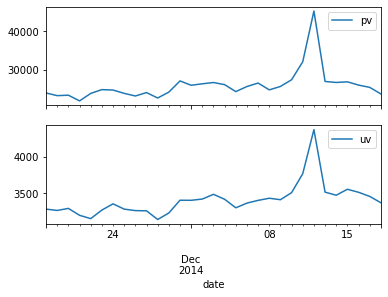

In [17]:
#pv指的是每天用户操作次数,先用groupby找到每天的用户点击量，然后用reset—index将它变成一个dataframe 然后重新命名columns，这样就变成了一个新的dataframe
#av指的是每天独立访客数量
pv_daily=data_user.groupby('date')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
print(pv_daily.head())
fig,axes=plt.subplots(2,1,sharex=True)
pv_daily.plot(x='date',y='pv',ax=axes[0])
uv_daily=data_user.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
uv_daily.plot(x='date',y='uv',ax=axes[1])

In [18]:
#uv记录每天不同用户额上线数量，如何用for来表达
#av_daily=data_user.groupby('date')['user_id']
#list=[]
#for sector,data in av_daily:
    #series(data).drop_duplicates()
    #data.drop_duplicates(subset=av_daily['user_id'])
    


#fig,axes=plt.subplots(2,1,sharex=True)
#pv_daily.plot(x='date',y='pv',ax=axes[0])

In [28]:
#pv_hour表示每小时访问量，uv_hour表示每小时独立客户的数量.从这两个图像可以看出，0-5点无论是访问量还是独立用户都在呈下降趋势。五点之后到上午十点，独立用户数量明显增加
#而晚上六点左右是用户点击量呈明显上升的趋势，说明六点以后是淘宝用户访问app的活跃阶段
data_user.sort_values(by=['date','hour'],inplace=True)
data_user.tail()



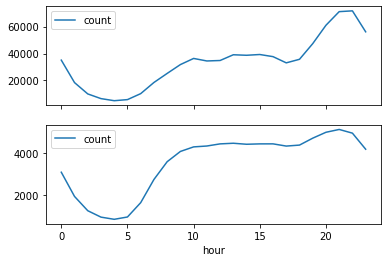

In [41]:
pv_hour=data_user.groupby(['hour'])['user_id'].count().reset_index().rename(columns={'user_id':'count'})
uv_hour=data_user.groupby(['hour'])['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'count'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hour',y='count',ax=axes[0])
uv_hour.plot(x='hour',y='count',ax=axes[1])
                                                                                                                            
                                                                                                

  behavior_type  hour  count
0             1     0  33078
1             1     1  17436
2             1     2   9511
3             1     3   6238
4             1     4   4733


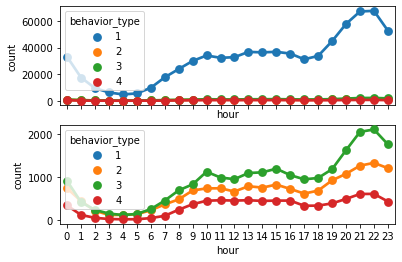

In [57]:
#各种用户行为都在何时发生，点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示。
#点击的行为活跃度最高，尤其在晚上六点之后。而加购物车的行为比收藏的行为要更多
be_hour=data_user.groupby(['behavior_type','hour'])['user_id'].count().reset_index().rename(columns={'user_id':'count'})
print(be_hour.head())
fig,axes=plt.subplots(2,1,sharex=True)
sns.pointplot(x='hour',y='count',hue='behavior_type',data=be_hour,ax=axes[0])

be1_hour=be_hour[be_hour['behavior_type']!=1]
sns.pointplot(x='hour',y='count',hue='behavior_type',data=be1_hour,ax=axes[1])
